In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def load_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50, 300), fontFace=font, fontScale=5, color=(255, 255, 255), thickness=25,
                lineType=cv2.LINE_AA)
    return blank_img


def display_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

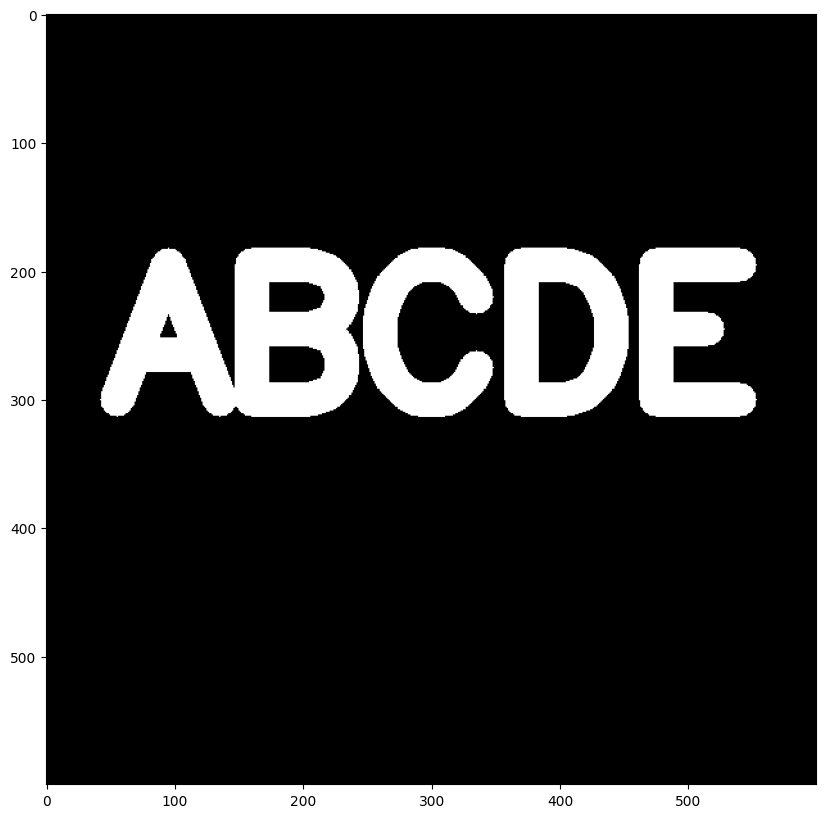

In [11]:
img = load_img()
display_img(img)

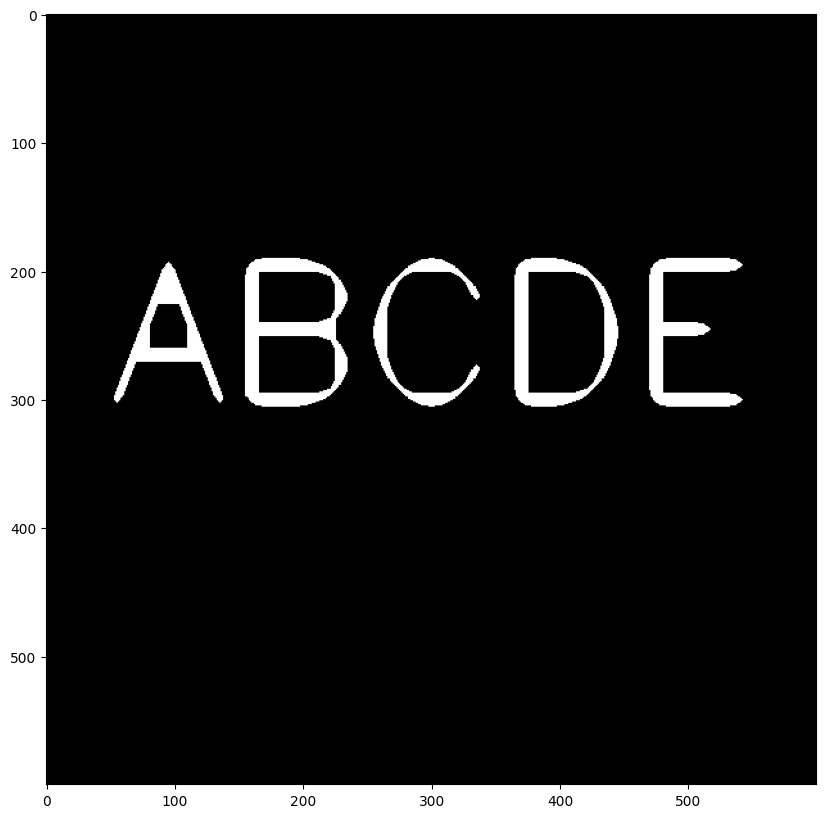

In [12]:
# Erosion MO - try to find edges
kernel = np.ones((5,5), dtype=np.uint8)
result = cv2.erode(img, kernel, iterations=4)
display_img(result)

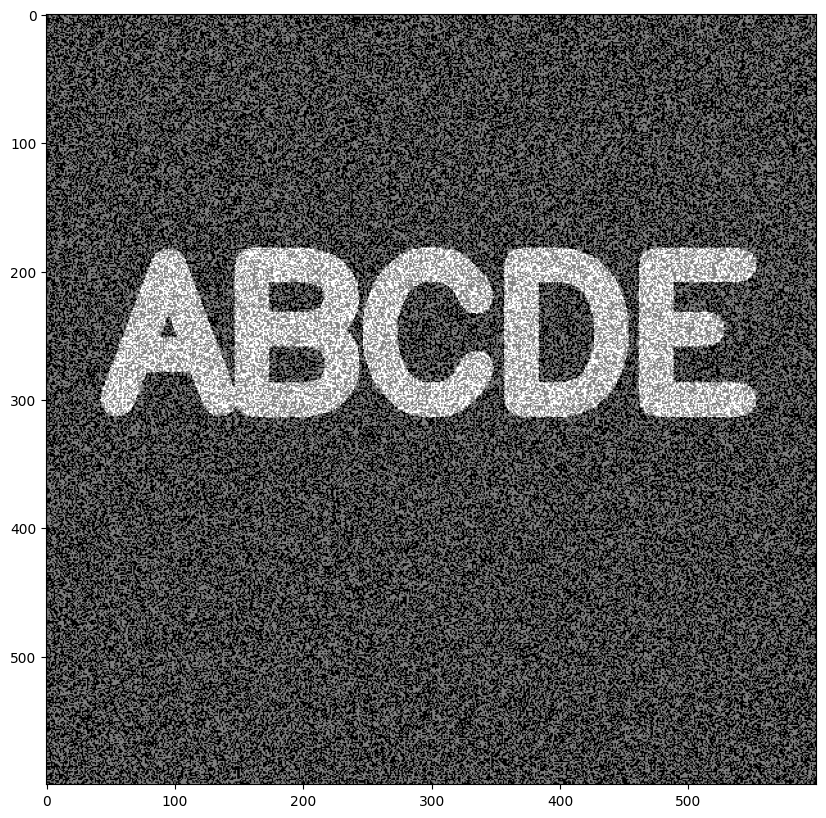

In [16]:
# add some white noise and then remove it
img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600, 600))
white_noise = white_noise * img.max()
noise_img = white_noise + img
display_img(noise_img)

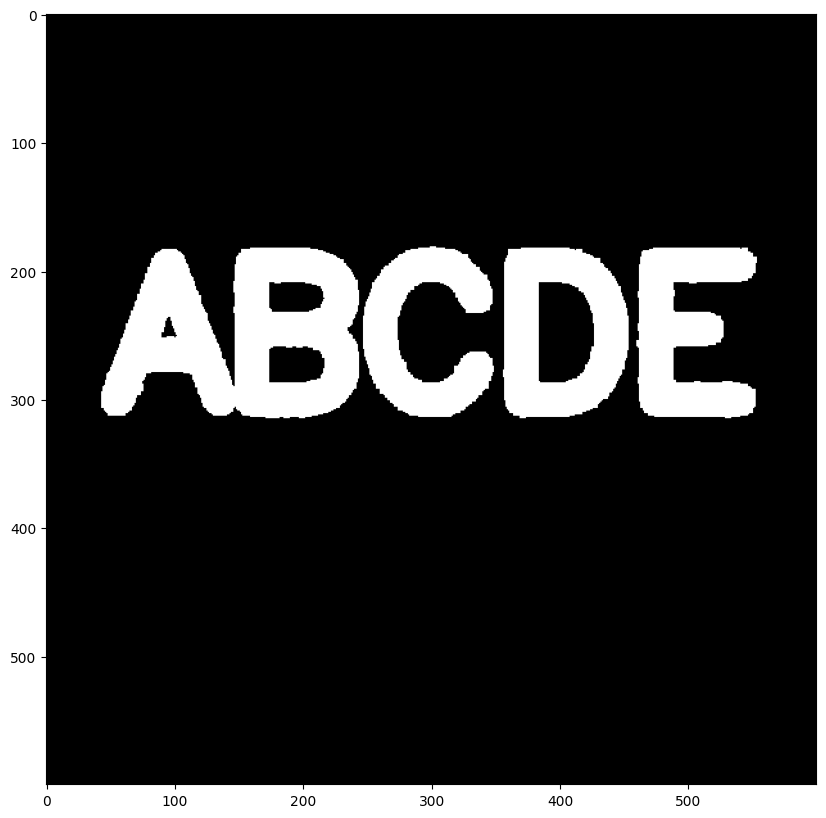

In [17]:
# Use opening to clean it.
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

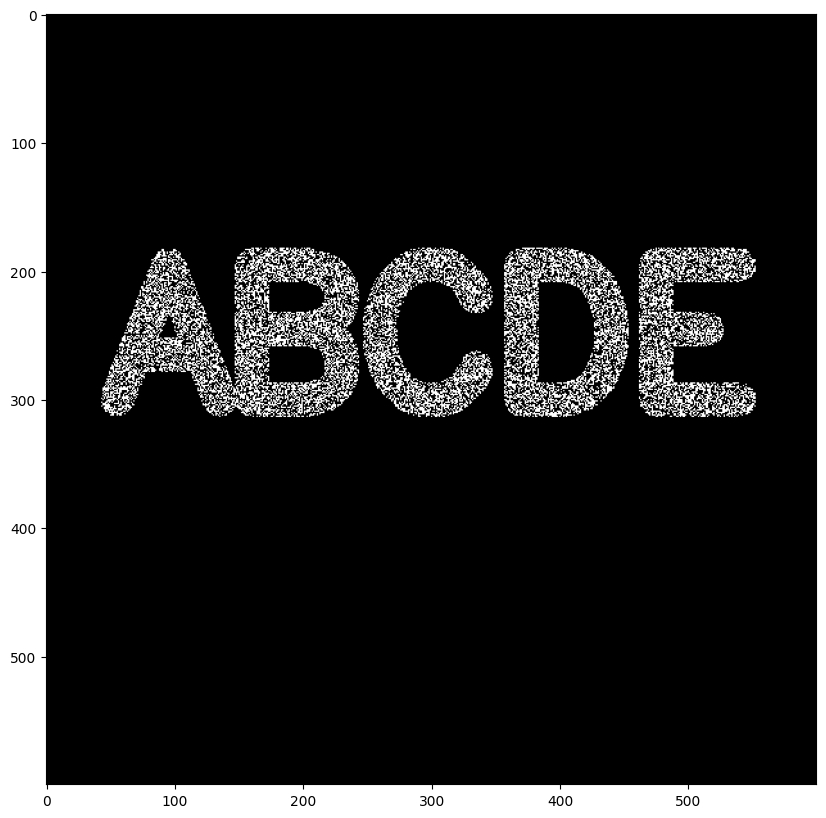

In [18]:
img = load_img()
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise = black_noise * -img.max()
black_noise_img = img + black_noise
black_noise_img[black_noise_img==-img.max()] = 0
display_img(black_noise_img)

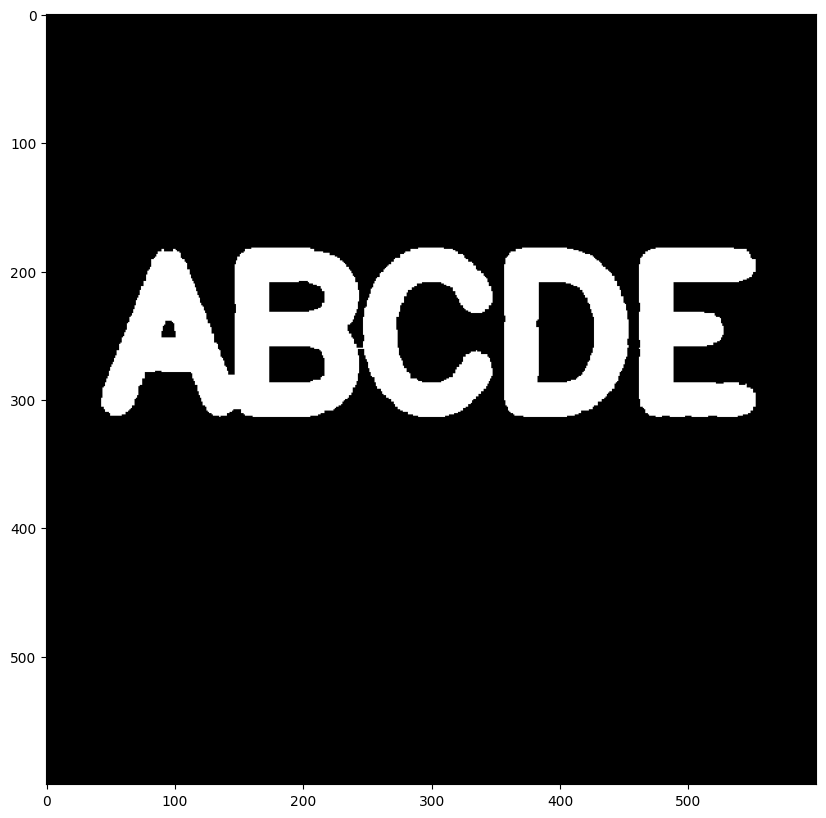

In [19]:
# apply closing to clean foreground noise
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

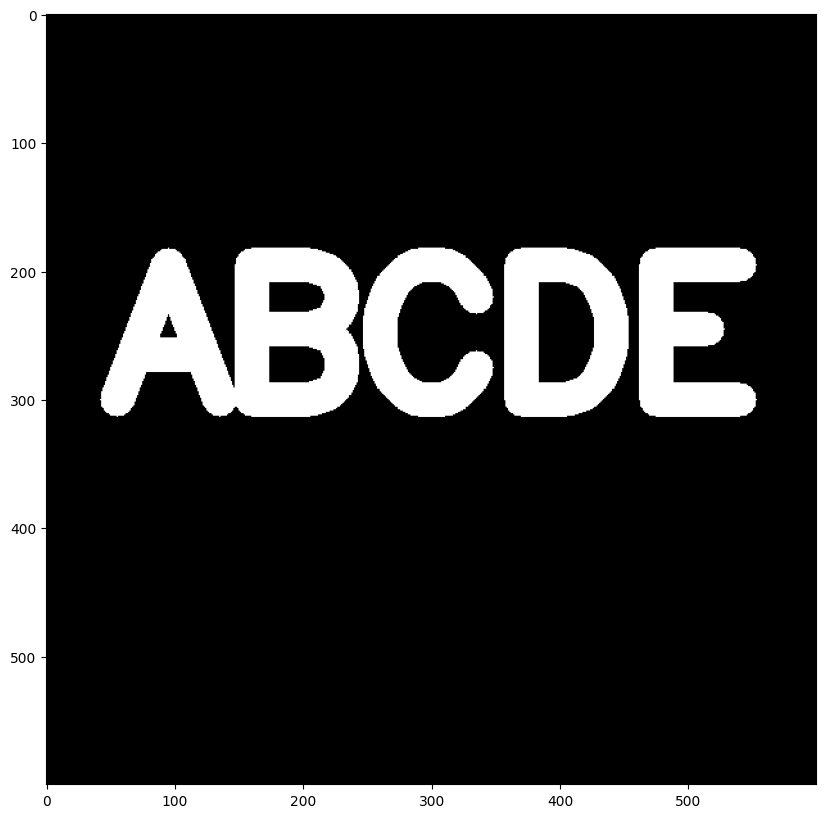

In [20]:
img=load_img()
display_img(img)

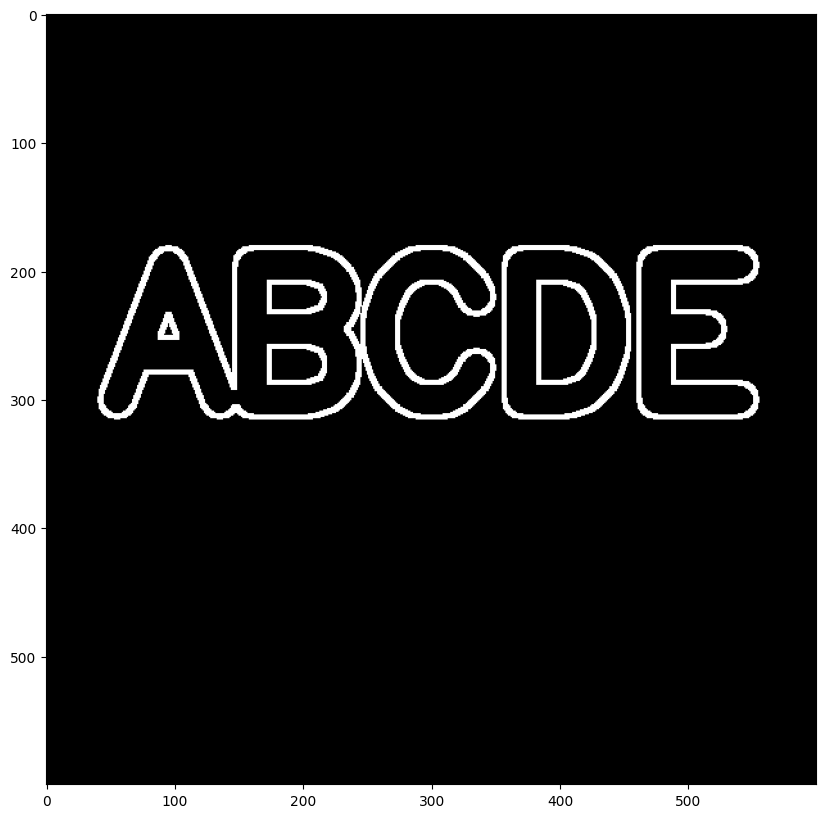

In [21]:
# simpole edge detection
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)